In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load the data, trade_id_conversion.csv and current_orders.csv
trade_id_conversion = pd.read_csv('trade_id_conversion.csv')
current_orders = pd.read_csv('current_orders.csv')
mt4_orders = pd.read_csv('orders in MT4.csv')

In [3]:
trade_id_conversion.head()

,Id,ticket
0,71,59824654
1,72,59825148
2,73,59825703
3,74,59826072
4,75,59826428


In [4]:
current_orders.head()

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,Profit,Margin,Fee,Closed
0,117,EURUSD,Sell,2.0,2024-05-03 22:50:00,1.07658,2024-05-03 22:55:00,1.07658,NaN,NaN,-4.000000e+00,2153.16,0.00002,False
1,113,EURUSD,Sell,2.0,2024-05-03 22:05:00,1.07676,2024-05-03 22:55:00,1.07658,NaN,NaN,3.200000e+01,2153.52,0.00002,False
2,116,EURUSD,Sell,2.0,2024-05-03 22:35:00,1.07686,2024-05-03 22:50:00,1.07658,218439.901373,218463.901373,4.800000e+01,2153.72,0.00004,True
3,115,EURUSD,Buy,2.0,2024-05-03 22:30:00,1.07687,2024-05-03 22:35:00,1.07686,218391.901373,218367.901373,-1.000000e+01,2153.74,0.00004,True
4,114,EURUSD,Sell,2.0,2024-05-03 22:25:00,1.07689,2024-05-03 22:30:00,1.07687,218401.901373,218371.901373,-1.820443e-11,2153.78,0.00002,True


In [15]:
# rename the Price.1 to closing_price, and Price to opening_price
mt4_orders_rn = mt4_orders.rename(columns={'Price.1': 'closing_price', 'Price': 'opening_price', 'Profit': 'actual_profit'})
# select just Ticket, Open Time, opening_price, closing_price, Close Time and actual_profit
mt4_orders_rn_sel = mt4_orders_rn[['Ticket', 'Open Time', 'opening_price','Close Time', 'closing_price', 'actual_profit']]
# make all the columns lowercase
mt4_orders_rn_sel.columns = map(str.lower, mt4_orders_rn_sel.columns)
mt4_orders_rn_sel.head()

,ticket,open time,opening_price,close time,closing_price,actual_profit
0,59824654,2024.05.03 17:15:02,1.07661,2024.05.03 17:25:01,1.07560,1.01
1,59825148,2024.05.03 17:20:02,1.07602,2024.05.03 17:25:02,1.07557,-0.45
2,59825703,2024.05.03 17:25:00,1.07577,2024.05.03 17:30:02,1.07571,0.06
3,59826072,2024.05.03 17:30:01,1.07571,2024.05.03 18:20:03,1.07730,1.59
4,59826428,2024.05.03 17:35:04,1.07556,2024.05.03 17:40:03,1.07629,0.73


In [18]:
2/200

0.01

In [19]:
# merge current_orders with trade_id_conversion on the Id column 

merged = pd.merge(current_orders, trade_id_conversion, on='Id', how='inner')
# merge the result with mt4_orders_rn_sel on the ticket column
merged_w_mt4 = pd.merge(merged, mt4_orders_rn_sel, on='ticket', how='inner')
# round the Profit column to 2 decimal places
merged_w_mt4['Profit'] = merged_w_mt4['Profit'].round(2)
merged_w_mt4.head()

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,Profit,Margin,Fee,Closed,ticket,open time,opening_price,close time,closing_price,actual_profit
0,117,EURUSD,Sell,2.0,2024-05-03 22:50:00,1.07658,2024-05-03 22:55:00,1.07658,NaN,NaN,-4.0,2153.16,0.00002,False,59834348,2024.05.03 22:55:01,1.07658,2024.05.03 23:00:02,1.07642,0.16
1,113,EURUSD,Sell,2.0,2024-05-03 22:05:00,1.07676,2024-05-03 22:55:00,1.07658,NaN,NaN,32.0,2153.52,0.00002,False,59833971,2024.05.03 22:10:04,1.07672,2024.05.03 23:00:02,1.07642,0.30
2,116,EURUSD,Sell,2.0,2024-05-03 22:35:00,1.07686,2024-05-03 22:50:00,1.07658,218439.901373,218463.901373,48.0,2153.72,0.00004,True,59834311,2024.05.03 22:40:02,1.07684,2024.05.03 22:55:02,1.07661,0.23
3,115,EURUSD,Buy,2.0,2024-05-03 22:30:00,1.07687,2024-05-03 22:35:00,1.07686,218391.901373,218367.901373,-10.0,2153.74,0.00004,True,59834214,2024.05.03 22:35:03,1.07690,2024.05.03 22:40:03,1.07686,-0.04
4,114,EURUSD,Sell,2.0,2024-05-03 22:25:00,1.07689,2024-05-03 22:30:00,1.07687,218401.901373,218371.901373,-0.0,2153.78,0.00002,True,59834164,2024.05.03 22:30:02,1.07688,2024.05.03 22:35:04,1.07692,-0.04


In [38]:
# create a new column called recalculated_profit which divides Profit by 200
merged_w_mt4.loc[:, 'recalculated_profit'] = merged_w_mt4['actual_profit']*(100*merged_w_mt4['Volume'])
# create a column that finds the difference between actual_profit and recalculated_profit
merged_w_mt4.loc[:, 'profit_difference'] = np.abs(merged_w_mt4['Profit']) - np.abs(merged_w_mt4['recalculated_profit'])
# create a column for the difference between the Entry Price and the opening_price
merged_w_mt4.loc[:, 'entry_difference'] = merged_w_mt4['Entry Price'] - merged_w_mt4['opening_price']
# create a column for the difference between the Exit Price and the closing_price
merged_w_mt4.loc[:, 'exit_difference'] = merged_w_mt4['Exit Price'] - merged_w_mt4['closing_price']
# filter out the rows where Exit Balance is null 
merged_w_mt4 = merged_w_mt4[~merged_w_mt4['Exit Balance'].isnull()]
# create a new column that is the absolute value of the difference column
merged_w_mt4.loc[:, 'profit_abs_difference'] = np.abs(merged_w_mt4['profit_difference'])
merged_w_mt4['profit_abs_difference'].describe()

count    44.000000
mean      9.073182
std      16.057182
min       0.000000
25%       2.000000
50%       3.000000
75%       8.000000
max      66.000000
Name: profit_abs_difference, dtype: float64

In [39]:
# save merged_w_mt4 to a csv file
merged_w_mt4.to_csv('merged_w_mt4.csv', index=False)

In [32]:
merged_w_mt4['entry_difference'].describe()

count    44.000000
mean     -0.000012
std       0.000040
min      -0.000140
25%      -0.000023
50%      -0.000010
75%       0.000010
max       0.000160
Name: entry_difference, dtype: float64

In [34]:
# filter to just where the entry difference is -0.00014
merged_w_mt4[merged_w_mt4['entry_difference'] <= -0.000139]

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,...,close time,closing_price,actual_profit,recalculated_profit,difference,abs_difference,profit_difference,entry_difference,exit_difference,profit_abs_difference
45,71,EURUSD,Sell,2.0,2024-05-03 17:10:00,1.07647,2024-05-03 17:20:00,1.07577,217411.701373,217371.701373,...,2024.05.03 17:25:01,1.0756,1.01,202.0,-66.0,66.0,-66.0,-0.00014,0.00017,66.0


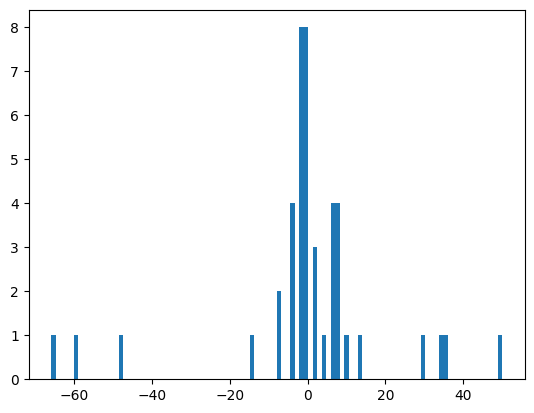

In [27]:
# plot the distribution of the the difference column
plt.hist(merged_w_mt4['difference'], bins=100)
plt.show()


In [28]:
merged_w_mt4.loc[:, ['Profit', 'recalculated_profit', 'difference', 'abs_difference']]

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,...,Closed,ticket,open time,opening_price,close time,closing_price,actual_profit,recalculated_profit,difference,abs_difference
2,116,EURUSD,Sell,2.00,2024-05-03 22:35:00,1.07686,2024-05-03 22:50:00,1.07658,218439.901373,218463.901373,...,True,59834311,2024.05.03 22:40:02,1.07684,2024.05.03 22:55:02,1.07661,0.23,46.0,2.0,2.0
3,115,EURUSD,Buy,2.00,2024-05-03 22:30:00,1.07687,2024-05-03 22:35:00,1.07686,218391.901373,218367.901373,...,True,59834214,2024.05.03 22:35:03,1.07690,2024.05.03 22:40:03,1.07686,-0.04,-8.0,-2.0,2.0
4,114,EURUSD,Sell,2.00,2024-05-03 22:25:00,1.07689,2024-05-03 22:30:00,1.07687,218401.901373,218371.901373,...,True,59834164,2024.05.03 22:30:02,1.07688,2024.05.03 22:35:04,1.07692,-0.04,-8.0,8.0,8.0
5,112,EURUSD,Sell,2.00,2024-05-03 22:00:00,1.07681,2024-05-03 22:25:00,1.07689,218401.901373,218431.901373,...,True,59833907,2024.05.03 22:05:02,1.07679,2024.05.03 22:30:03,1.07690,-0.11,-22.0,2.0,2.0
6,111,EURUSD,Buy,2.00,2024-05-03 21:55:00,1.07674,2024-05-03 22:00:00,1.07681,218421.901373,218421.901373,...,True,59833860,2024.05.03 22:00:02,1.07676,2024.05.03 22:05:04,1.07679,0.03,6.0,0.0,0.0
7,110,EURUSD,Sell,2.00,2024-05-03 21:50:00,1.07661,2024-05-03 22:00:00,1.07681,218415.901373,218421.901373,...,True,59833818,2024.05.03 21:55:03,1.07662,2024.05.03 22:05:03,1.07682,-0.20,-40.0,-4.0,4.0
8,109,EURUSD,Buy,2.00,2024-05-03 21:40:00,1.07663,2024-05-03 21:50:00,1.07661,218459.901373,218495.901373,...,True,59833723,2024.05.03 21:45:04,1.07665,2024.05.03 21:55:04,1.07662,-0.03,-6.0,0.0,0.0
9,108,EURUSD,Buy,2.00,2024-05-03 21:35:00,1.07660,2024-05-03 21:50:00,1.07661,218465.901373,218495.901373,...,True,59833655,2024.05.03 21:40:02,1.07663,2024.05.03 21:55:04,1.07662,-0.01,-2.0,0.0,0.0
10,106,EURUSD,Sell,2.00,2024-05-03 21:20:00,1.07659,2024-05-03 21:40:00,1.07663,218467.901373,218469.901373,...,True,59833233,2024.05.03 21:25:04,1.07661,2024.05.03 21:45:04,1.07665,-0.04,-8.0,-2.0,2.0
11,107,EURUSD,Buy,2.00,2024-05-03 21:30:00,1.07667,2024-05-03 21:35:00,1.07660,218477.901373,218473.901373,...,True,59833525,2024.05.03 21:35:24,1.07669,2024.05.03 21:40:04,1.07661,-0.08,-16.0,0.0,0.0
